<a href="https://www.kaggle.com/tuanvqn/ml-titanic-survivor?scriptVersionId=89445760" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
print("Setup Complete")        

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv
Setup Complete


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
print(train_data.shape)
train_data.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(test_data.shape)
test_data.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [6]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [7]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
# Check NaN
train_data['Cabin'].isnull().values.any()
# Count NaN
NaN_Survived = train_data['Survived'].isnull().sum()
NaN_Pclass = train_data['Pclass'].isnull().sum()
NaN_Name = train_data['Name'].isnull().sum()
NaN_Sex = train_data['Sex'].isnull().sum()
NaN_Age = train_data['Age'].isnull().sum()
NaN_SibSp = train_data['SibSp'].isnull().sum()
NaN_Parch = train_data['Parch'].isnull().sum()
NaN_Ticket = train_data['Ticket'].isnull().sum()
NaN_Fare = train_data['Fare'].isnull().sum()
NaN_Cabin = train_data['Cabin'].isnull().sum()
NaN_Embarked = train_data['Embarked'].isnull().sum()


print('NaN_Survived = ', NaN_Survived)
print('NaN_Pclass = ',NaN_Pclass)
print('NaN_Name = ', NaN_Name)
print('NaN_Sex = ', NaN_Sex)
print('NaN_Age = ', NaN_Age) # Missing values
print('NaN_SibSp = ', NaN_SibSp)
print('NaN_Parch = ', NaN_Parch)
print('NaN_Ticket = ', NaN_Ticket) # Problem: missing subset in Test
print('NaN_Fare = ', NaN_Fare)
print('NaN_Cabin = ', NaN_Cabin) # Missing values
print('NaN_Embarked = ', NaN_Embarked) # Missing values

NaN_Survived =  0
NaN_Pclass =  0
NaN_Name =  0
NaN_Sex =  0
NaN_Age =  177
NaN_SibSp =  0
NaN_Parch =  0
NaN_Ticket =  0
NaN_Fare =  0
NaN_Cabin =  687
NaN_Embarked =  2


In [10]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer


# Target
y_train = train_data["Survived"]

# Without imputation
#features = ["Pclass", "Sex", "SibSp", "Parch"]
# With imputation
#features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Cabin", "Embarked"]
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

X_train = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# Imputation
#my_imputer = SimpleImputer() # default is strategy='mean'
my_imputer = SimpleImputer(strategy='median')

imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_test = pd.DataFrame(my_imputer.transform(X_test))

#model = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=1)
model = RandomForestClassifier(n_estimators=1000, random_state=1)
#model = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=1)
#model = RandomForestClassifier(n_estimators=1000, random_state=1)
#model = RandomForestRegressor(n_estimators=1000, min_samples_split=10, criterion='mae', random_state=1)

#model.fit(X_train, y_train)
model.fit(imputed_X_train, y_train)
predictions = model.predict(imputed_X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!


In [11]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


In [12]:
train_data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 72.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 46.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Survived', ylabel='Fare'>

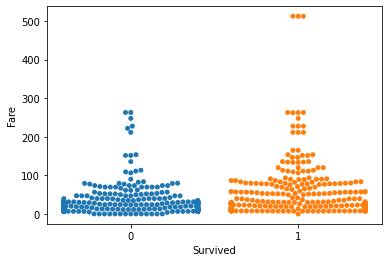

In [13]:
sns.swarmplot(x=train_data['Survived'],
              y=train_data['Fare'])

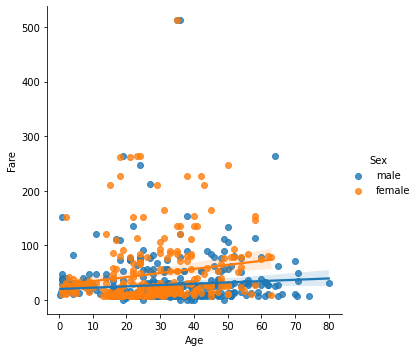

In [14]:
sns.lmplot(x='Age', 
           y='Fare',
           hue="Sex", 
           data=train_data)

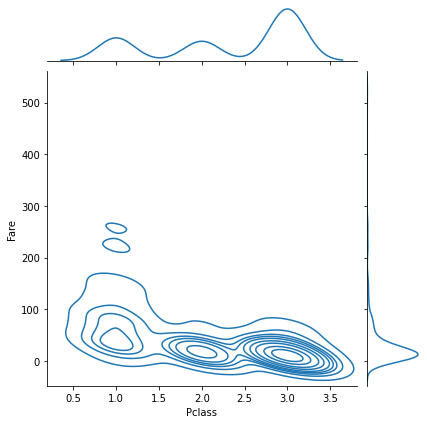

In [15]:
sns.jointplot(x=train_data['Pclass'], 
              y=train_data['Fare'], kind="kde")

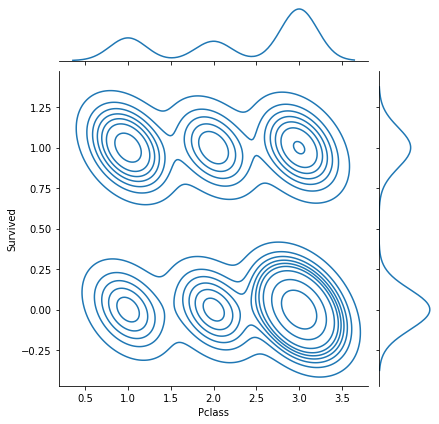

In [16]:
sns.jointplot(x=train_data['Pclass'], 
              y=train_data['Survived'], kind="kde")

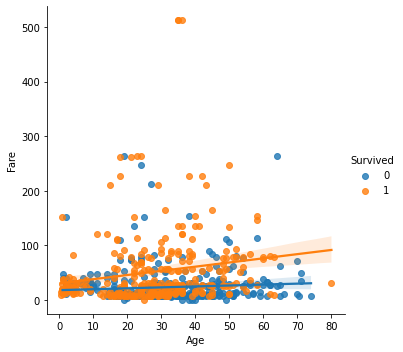

In [17]:
sns.lmplot(x='Age', 
           y='Fare',
           hue="Survived", 
           data=train_data)

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Sex', ylabel='Age'>

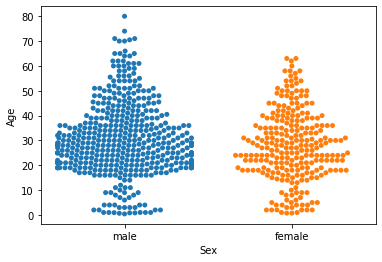

In [18]:
sns.swarmplot(x=train_data['Sex'],
              y=train_data['Age'])

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 36.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 69.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 84.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

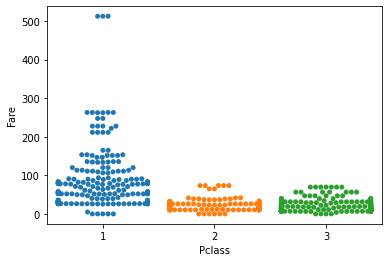

In [19]:
sns.swarmplot(x=train_data['Pclass'],
              y=train_data['Fare'])

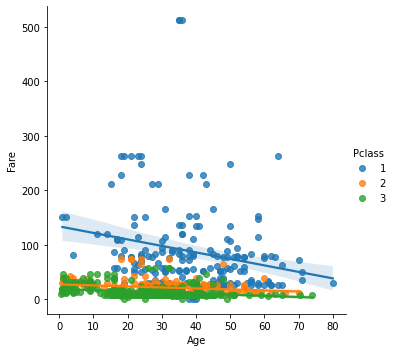

In [20]:
sns.lmplot(x='Age', 
           y='Fare',
           hue="Pclass", 
           data=train_data)

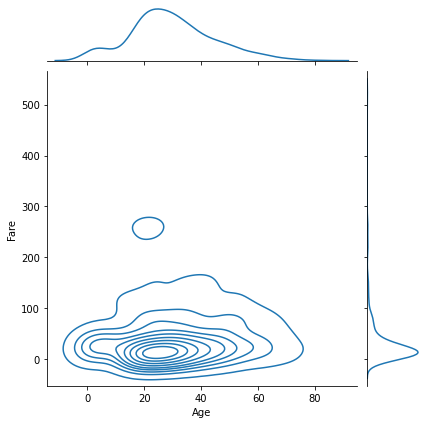

In [21]:
sns.jointplot(x=train_data['Age'], 
              y=train_data['Fare'], kind="kde")

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 15.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

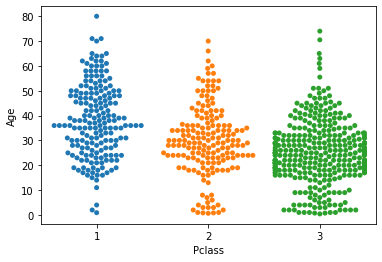

In [22]:
sns.swarmplot(x=train_data['Pclass'],
              y=train_data['Age'])